In [12]:
import os
import pandas as pd
import geopandas as gpd

local_crs = 32636
example_data_path = "./data"

Only blocks and matrix is needed to initialize a ``City`` model

In [13]:
from blocksnet.models import City 

aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

city_model = City(aggregated_blocks, accessibility_matrix)

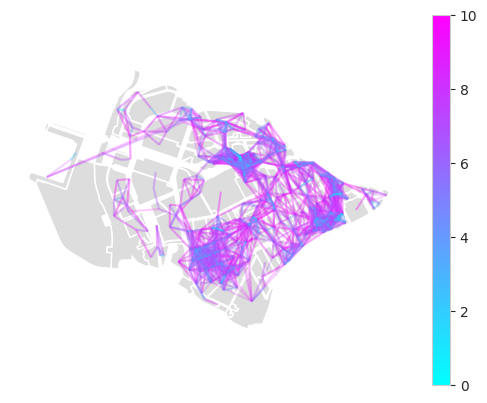

In [14]:
city_model.plot(10)

``Block`` can be accessed via ``id``

``ServiceType`` entity can be obtained the same way by ``name``

In [15]:
block_123 = city_model[123]
service_type_schools = city_model['schools']

We can calculate, how much the service should supply to satisfy population needs

In [16]:
city_model['schools'].calculate_in_need(110)

14

``ServiceType`` is an entity, which describes certain service types available for the city, but doesn't provide geospatial services information (e.g. schools locations)

In [17]:
city_model.service_types

[ServiceType(name='kindergartens', accessibility=10, demand=61),
 ServiceType(name='schools', accessibility=15, demand=120),
 ServiceType(name='recreational_areas', accessibility=15, demand=6000),
 ServiceType(name='hospitals', accessibility=60, demand=9),
 ServiceType(name='pharmacies', accessibility=10, demand=50),
 ServiceType(name='policlinics', accessibility=15, demand=27)]

In [18]:
city_model.add_service_type('bakeries', accessibility=30, demand=100)
city_model['bakeries']

ServiceType(name='bakeries', accessibility=30, demand=100)

But now we can aggregate the info directly to the ``Block`` of the ``City`` from the ``GeoDataFrame``

In [19]:
bakeries = gpd.read_file(os.path.join(example_data_path, "bakeries.geojson")).to_crs(local_crs)
city_model.update_services('bakeries', bakeries)
city_model[9].services[city_model['bakeries']]

,geometry,capacity
4,POINT (344993.322 6647645.470),530


In [21]:
buildings = gpd.read_parquet(os.path.join(example_data_path, "buildings.parquet")).to_crs(local_crs)
buildings = buildings.rename(columns={
  'population_balanced': 'population',
  'storeys_count': 'floors',
  'total_area': 'area'
})
city_model.update_buildings(buildings)

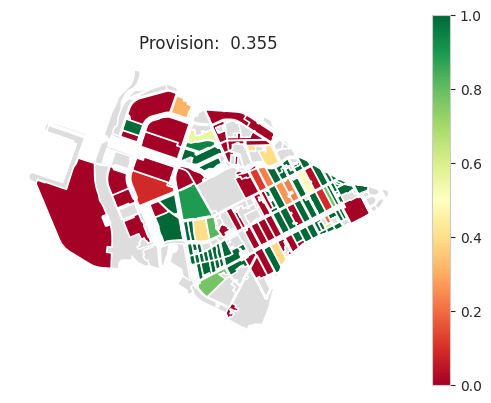

In [22]:
from blocksnet.method.provision import Provision
prov = Provision(city_model=city_model)
prov.plot(prov.calculate('bakeries'))

In [23]:
city_model.to_pickle('city_model.pickle')